In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
lead_data = pd.read_csv('Leads.csv')

In [3]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## Lets Check duplicates 

In [5]:
lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [6]:
lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

In [7]:
## We can see above that, there is no duplicates values in Prospect ID and Lead Number

In [8]:
## Now Lets do EDA, and work on Data Cleaning

In [9]:
lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
lead_data = lead_data.replace('Select',np.nan)

In [11]:
lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [12]:
lead_data= lead_data.drop(['Magazine','Receive More Updates About Our Courses',
                           'Update me on Supply Chain Content',
                           'I agree to pay the amount through cheque',
                           'Get updates on DM Content'],axis=1)

In [13]:
lead_data.isnull().sum()
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
lead_data = lead_data.drop(['Asymmetrique Profile Score',
                            'Lead Profile','Lead Quality',
                            'Asymmetrique Activity Index',
                            'Asymmetrique Activity Score',
                            'Asymmetrique Profile Index',
                            'How did you hear about X Education',],axis =1)

In [15]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [16]:
lead_data['Specialization'] = lead_data['Specialization'].fillna('not provided')
lead_data['City'] = lead_data['City'].fillna('not provided')
lead_data['Tags'] = lead_data['Tags'].fillna('not provided')
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('not provided')
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('not provided')
lead_data['Country'] = lead_data['Country'].fillna('not provided')
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [17]:
### change not provided

In [18]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [19]:
lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category 

In [21]:
lead_data['Country'] = lead_data.apply(lambda x:slots(x['Country']), axis = 1)
lead_data['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [22]:
lead_data['Country'] = lead_data['Country'].replace('not provided','India')
lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [23]:
round(100*(sum(lead_data.isnull().sum(axis=1) > 1)/lead_data.shape[0]),2)

1.48

In [24]:
lead_data = lead_data[lead_data.isnull().sum(axis=1) < 1 ]
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

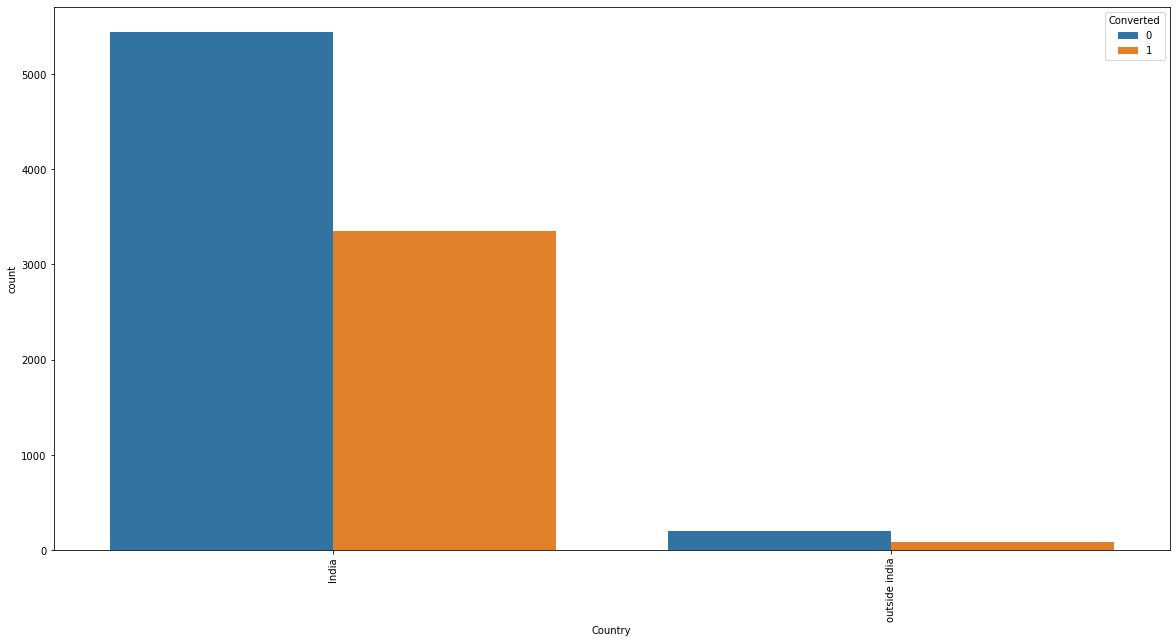

In [25]:
plt.figure(figsize=(20,10))
s1=sns.countplot(lead_data.Country, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
cont_drop=['Country']
lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

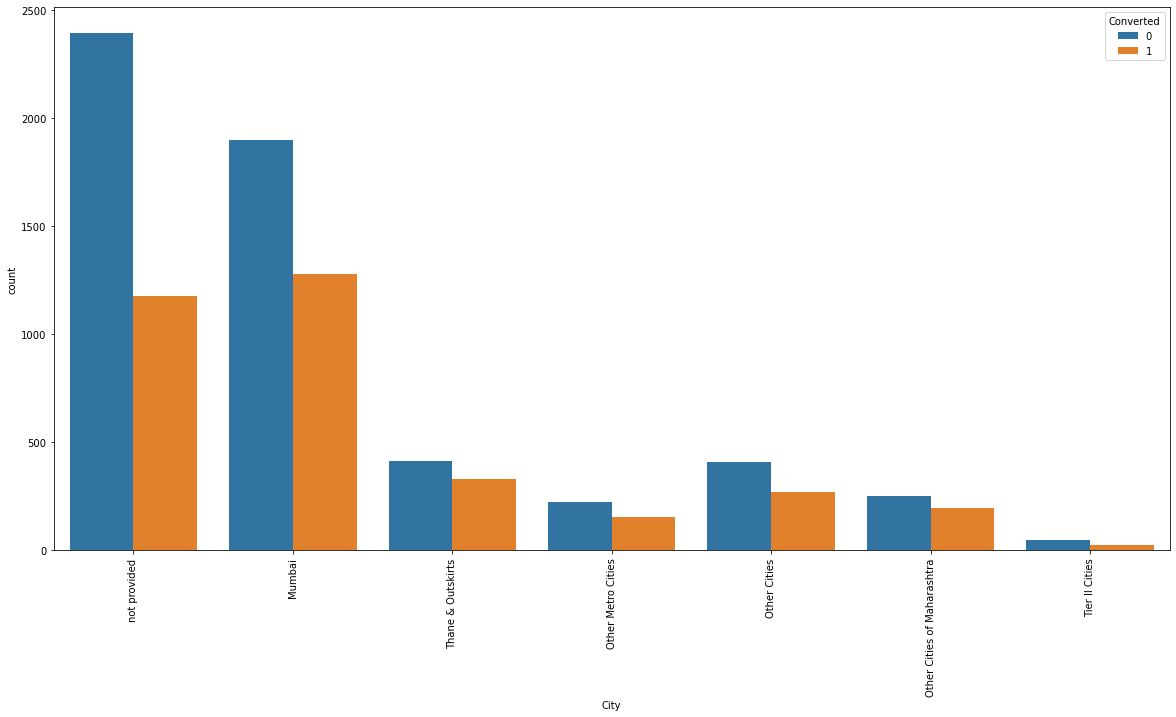

In [27]:
plt.figure(figsize=(20,10))
s1=sns.countplot(lead_data.City, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Text(0.5, 1.0, 'Lead Origin')

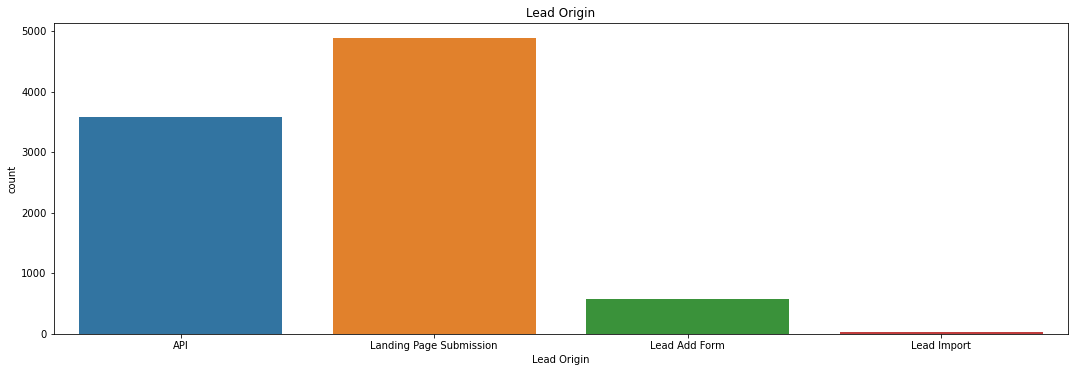

In [28]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,1)
sns.countplot(lead_data['Lead Origin'])
plt.title('Lead Origin')

Text(0.5, 1.0, 'Do Not Email')

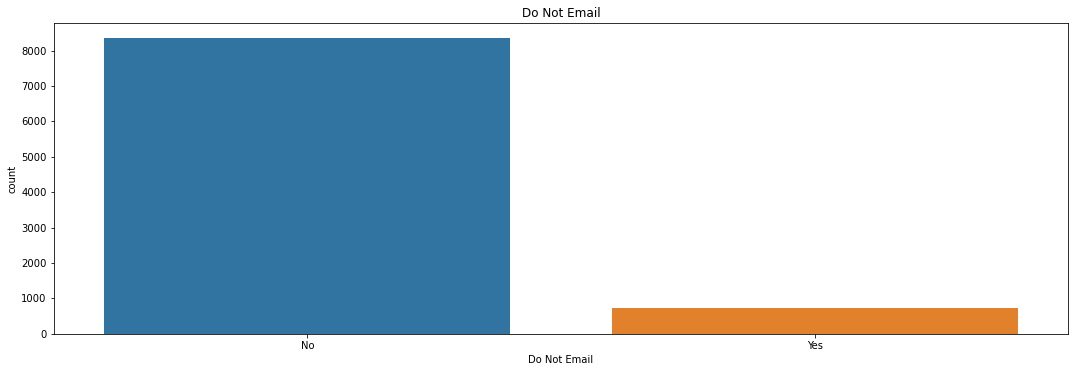

In [29]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,2)
sns.countplot(lead_data['Do Not Email'])
plt.title('Do Not Email')

Text(0.5, 1.0, 'Do Not Call')

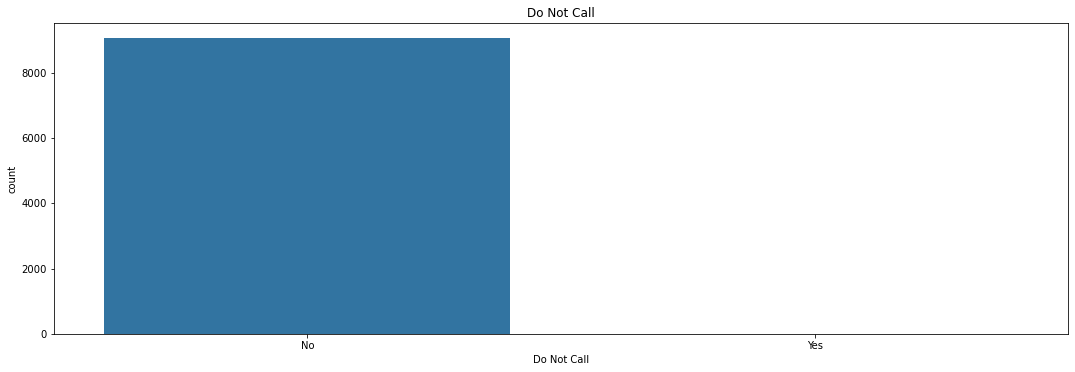

In [30]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,3)
sns.countplot(lead_data['Do Not Call'])
plt.title('Do Not Call')

Text(0.5, 1.0, 'Country')

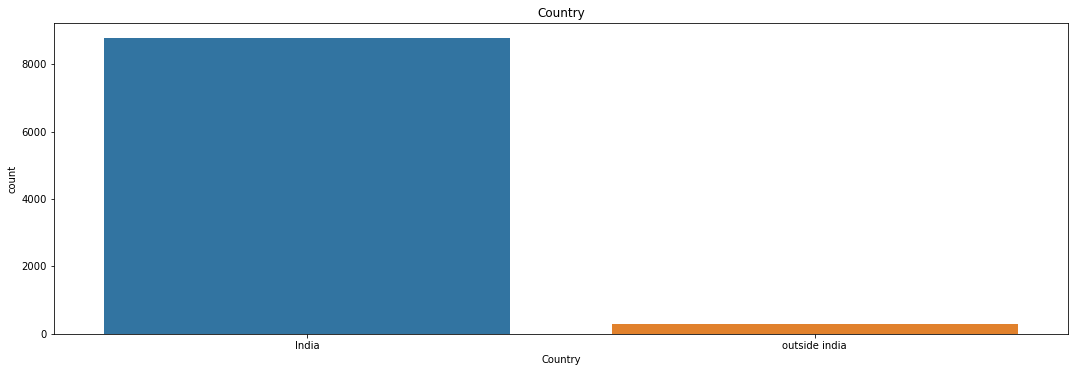

In [31]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,4)
sns.countplot(lead_data['Country'])
plt.title('Country')

Text(0.5, 1.0, 'Search')

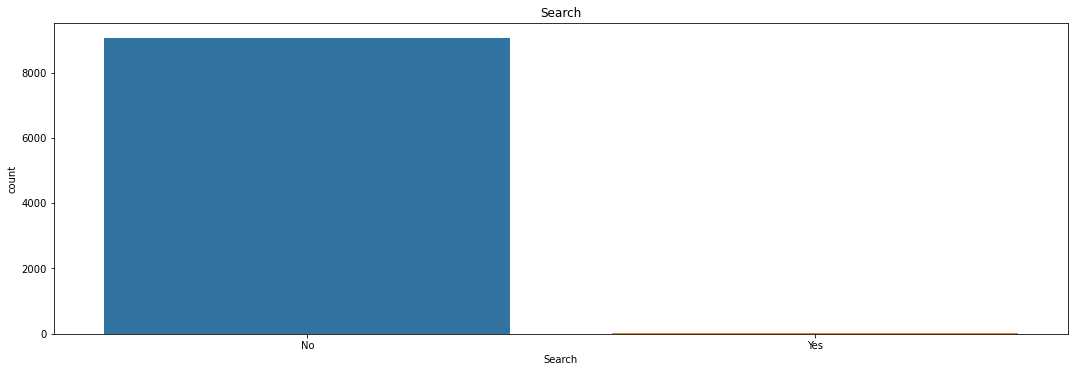

In [32]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,5)
sns.countplot(lead_data['Search'])
plt.title('Search')

Text(0.5, 1.0, 'Newspaper Article')

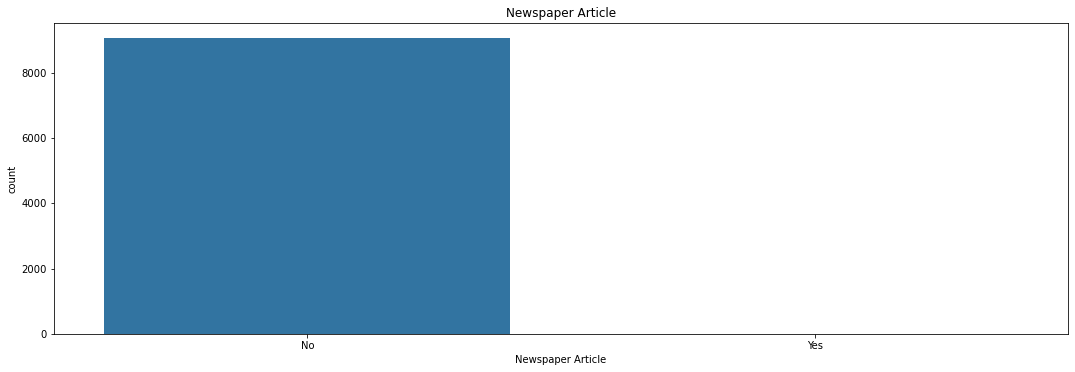

In [33]:

plt.figure(figsize = (40,40))
plt.subplot(6,2,6)
sns.countplot(lead_data['Newspaper Article'])
plt.title('Newspaper Article')

Text(0.5, 1.0, 'X Education Forums')

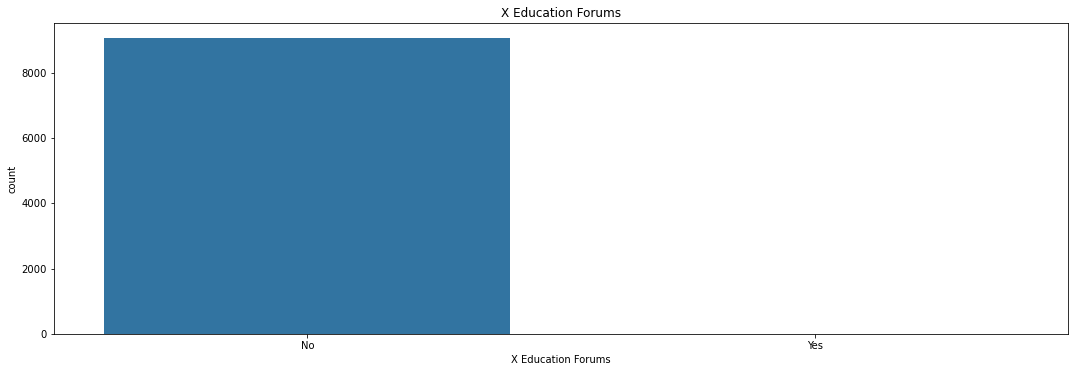

In [34]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,7)
sns.countplot(lead_data['X Education Forums'])
plt.title('X Education Forums')

Text(0.5, 1.0, 'Newspaper')

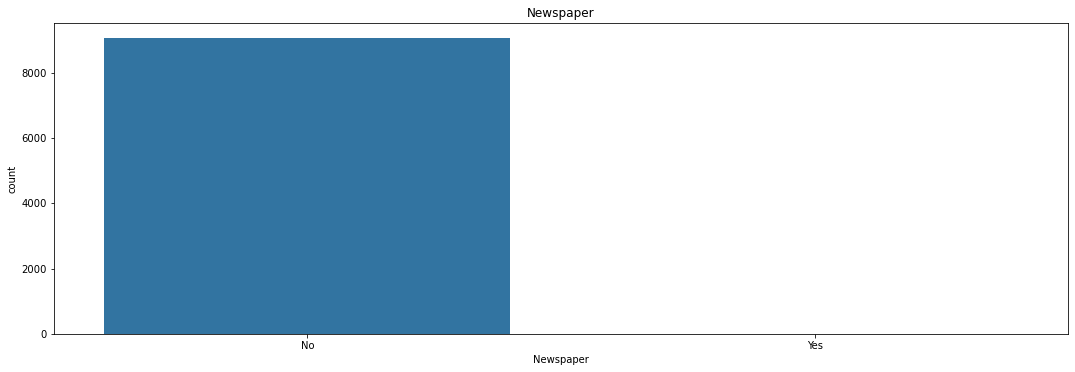

In [35]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,8)
sns.countplot(lead_data['Newspaper'])
plt.title('Newspaper')

Text(0.5, 1.0, 'Digital Advertisement')

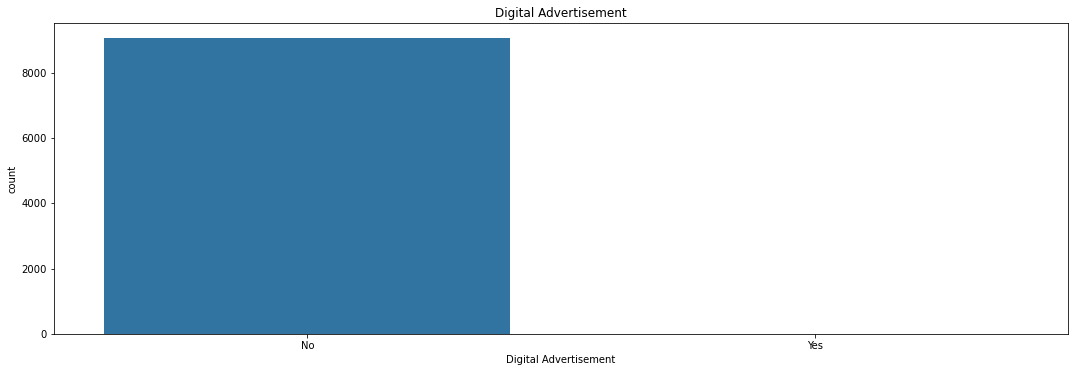

In [36]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,9)
sns.countplot(lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

Text(0.5, 1.0, 'Through Recommendations')

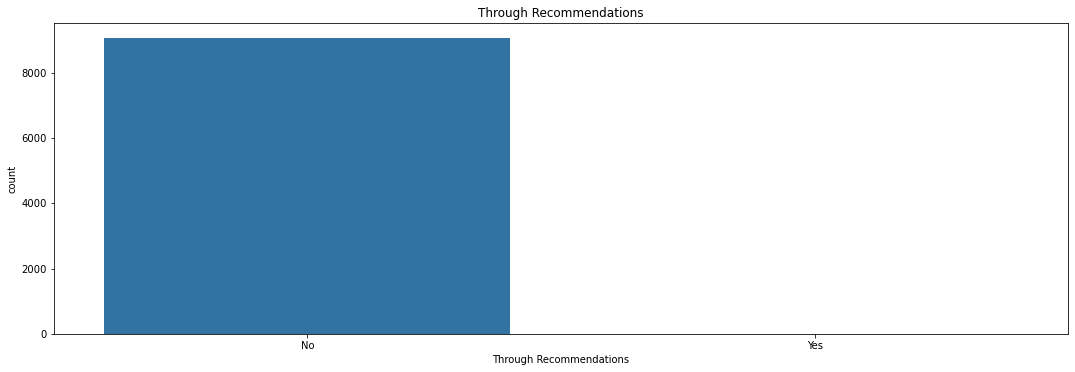

In [37]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,10)
sns.countplot(lead_data['Through Recommendations'])
plt.title('Through Recommendations')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

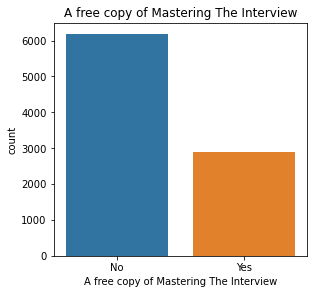

In [38]:
plt.figure(figsize = (10,30))
plt.subplot(6,2,11)
sns.countplot(lead_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

Text(0.5, 1.0, 'Last Notable Activity')

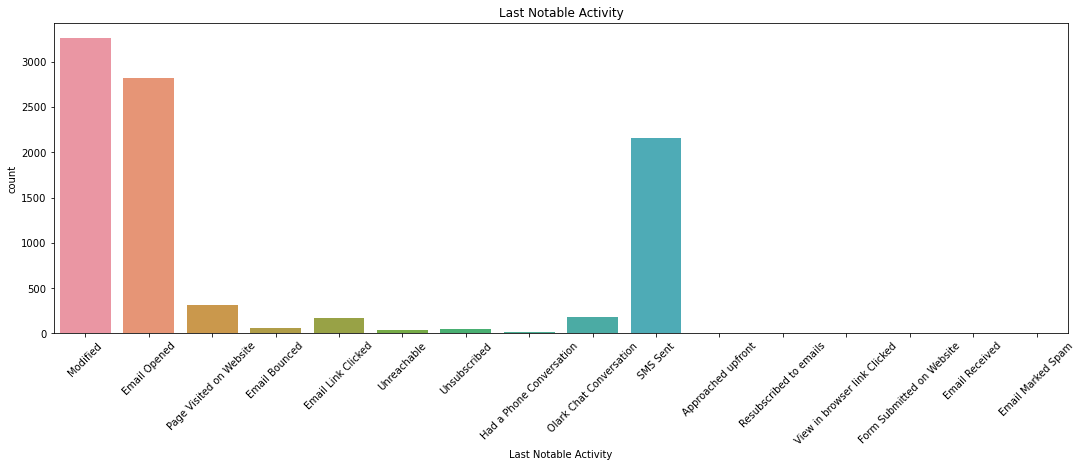

In [39]:
plt.figure(figsize = (40,40))
plt.subplot(6,2,12)
sns.countplot(lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 45)
plt.title('Last Notable Activity')

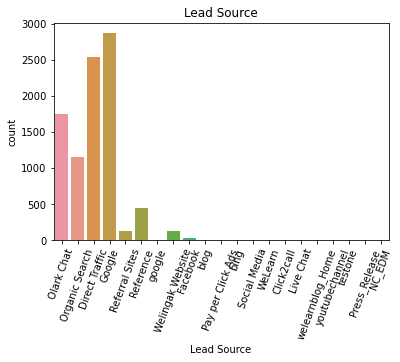

In [40]:
sns.countplot(lead_data['Lead Source']).tick_params(axis='x', rotation = 70)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Specialization')

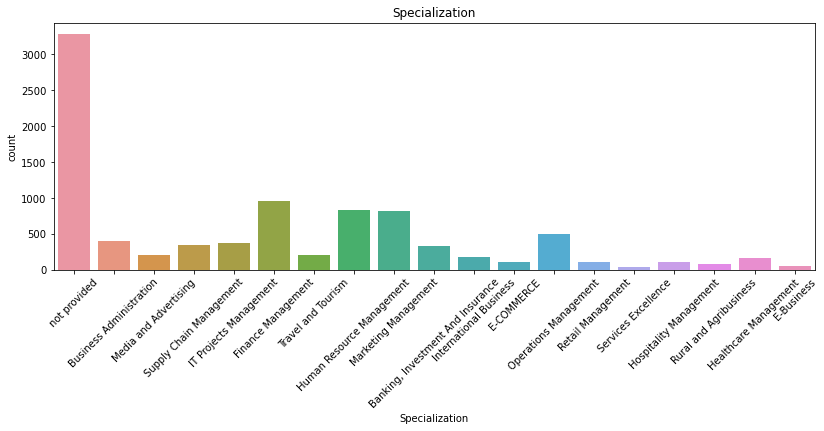

In [41]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,1)
sns.countplot(lead_data['Specialization']).tick_params(axis='x', rotation = 45)
plt.title('Specialization')

Text(0.5, 1.0, 'Current Occupation')

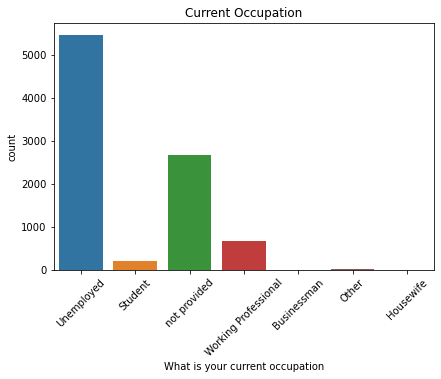

In [42]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,2)
sns.countplot(lead_data['What is your current occupation']).tick_params(axis='x', rotation = 45)
plt.title('Current Occupation')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

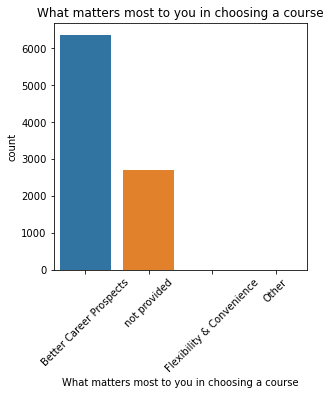

In [43]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
sns.countplot(lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 45)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'Last Activity')

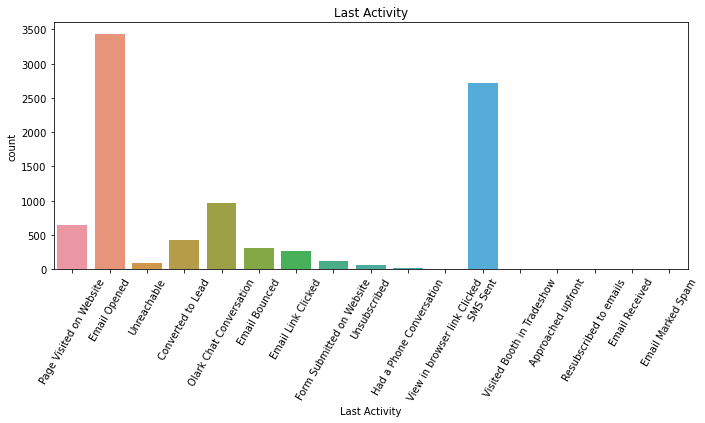

In [44]:
plt.figure(figsize = (25,10))
plt.subplot(2,2,4)
sns.countplot(lead_data['Last Activity']).tick_params(axis='x', rotation = 60)
plt.title('Last Activity')

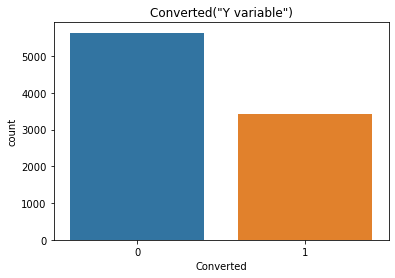

In [45]:
sns.countplot(lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

(0.0, 25.0)

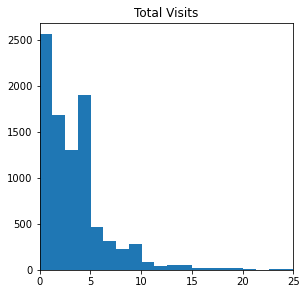

In [46]:

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

Text(0.5, 1.0, 'Total Time Spent on Website')

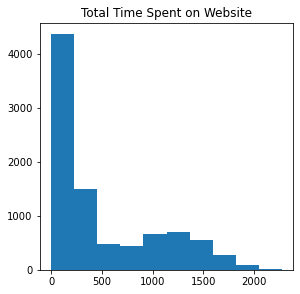

In [47]:
plt.figure(figsize = (10,10))
plt.subplot(222)
plt.hist(lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

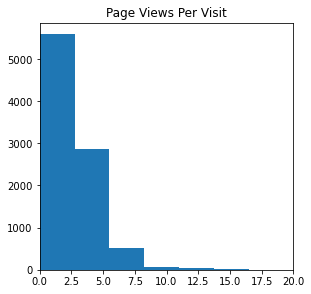

In [48]:
plt.figure(figsize = (10,10))
plt.subplot(223)
plt.hist(lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )   

In [49]:
## Now convert categorical variables to Converted

Text(0.5, 1.0, 'Lead Origin')

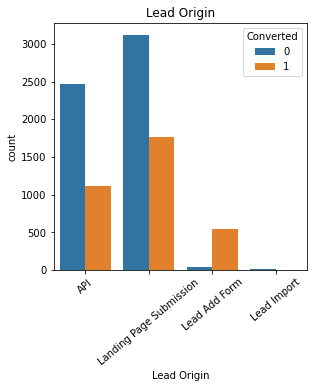

In [50]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 40)
plt.title('Lead Origin')

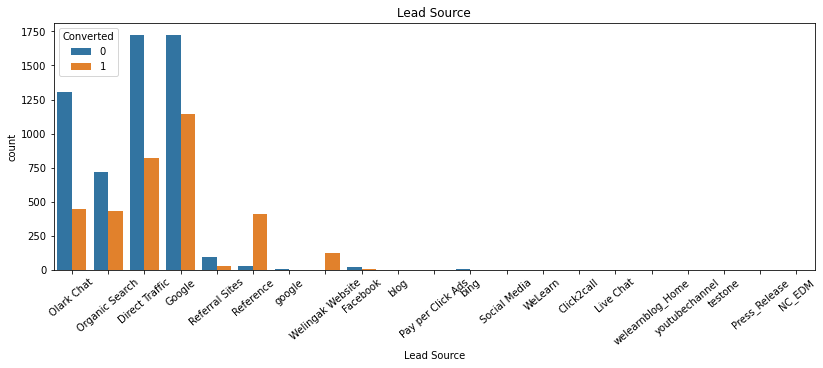

In [51]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 40)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Do Not Email')

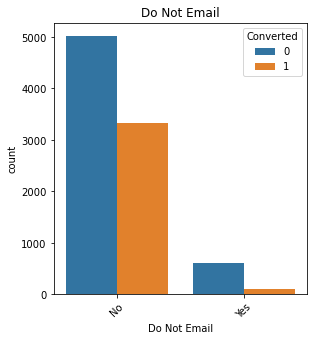

In [52]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Do Not Email')

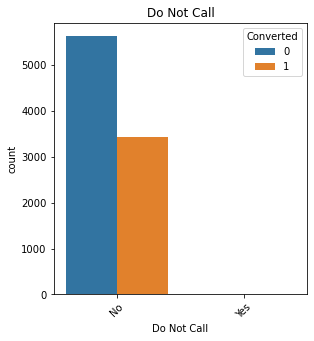

In [53]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

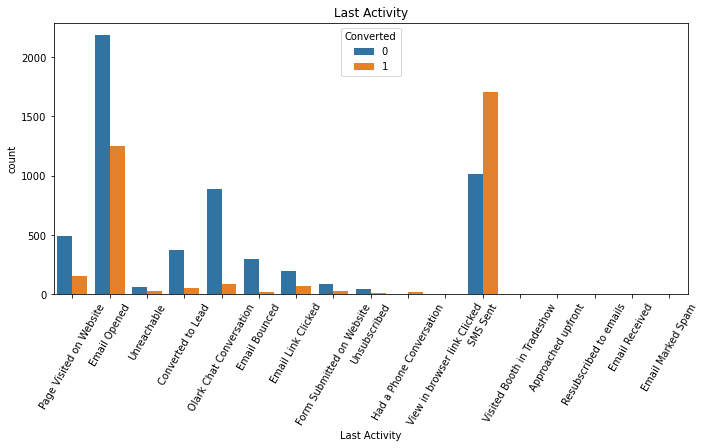

In [54]:
plt.figure(figsize = (25,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 60)
plt.title('Last Activity')

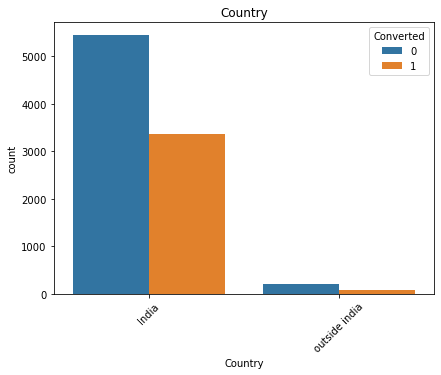

In [55]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Country')
plt.show()

Text(0.5, 1.0, 'Specialization')

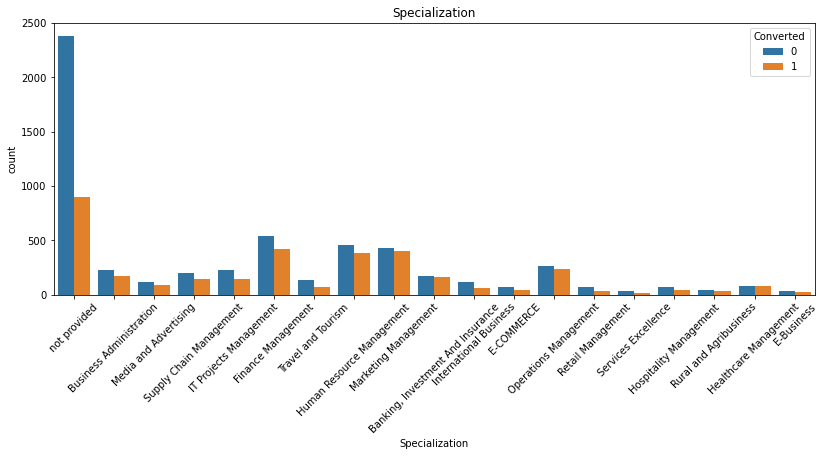

In [56]:
plt.figure(figsize = (30,5))
plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Specialization')

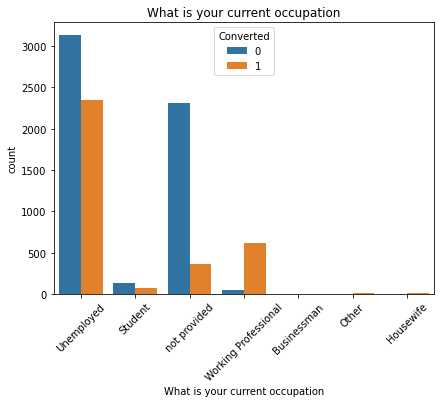

In [57]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('What is your current occupation')
plt.show()

Text(0.5, 1.0, 'What matters most to you in choosing a course')

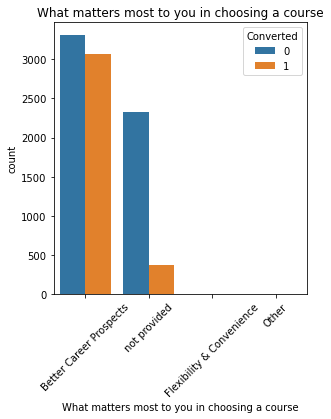

In [58]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('What matters most to you in choosing a course')

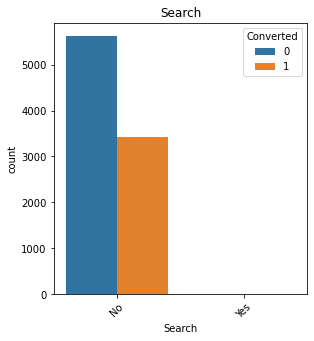

In [59]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Search')
plt.show()

Text(0.5, 1.0, 'Newspaper Article')

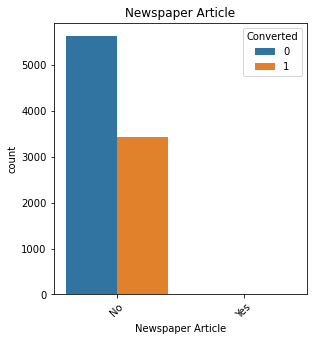

In [60]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Newspaper Article')

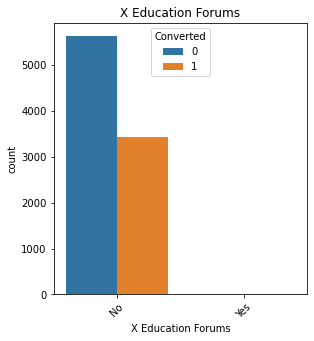

In [61]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('X Education Forums')
plt.show()

Text(0.5, 1.0, 'Newspaper')

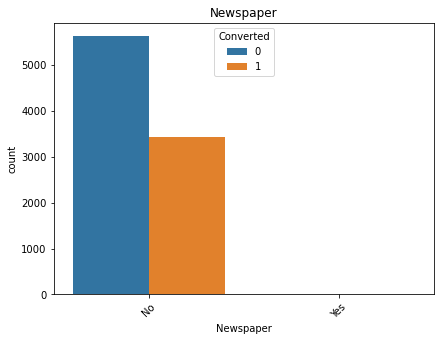

In [62]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Newspaper')

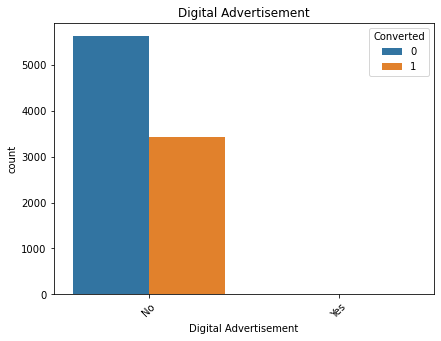

In [63]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Digital Advertisement')
plt.show()

Text(0.5, 1.0, 'Through Recommendations')

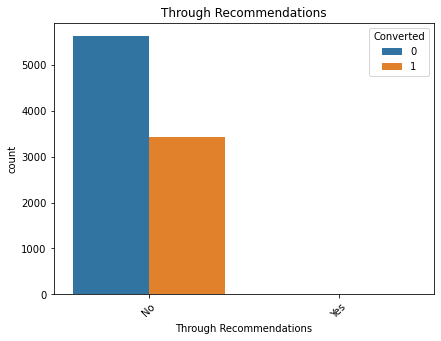

In [64]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Through Recommendations')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

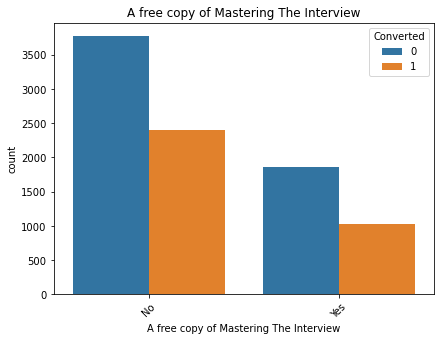

In [65]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('A free copy of Mastering The Interview')

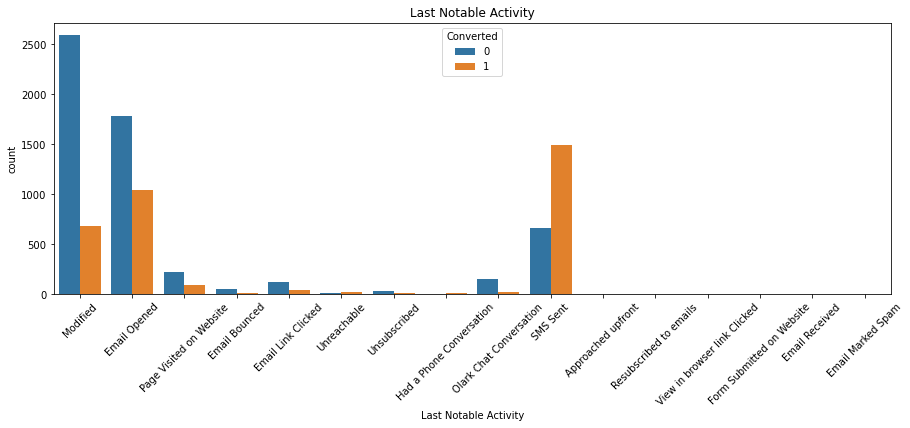

In [66]:
plt.figure(figsize = (15,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 45)
plt.title('Last Notable Activity')
plt.show()

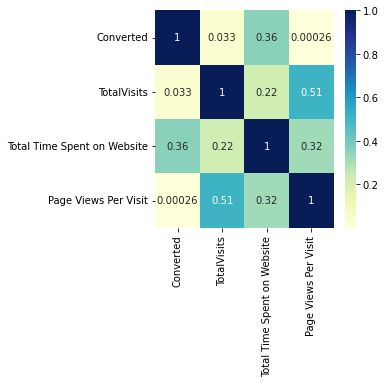

In [67]:
plt.figure(figsize=(4,4))
sns.heatmap(lead_data.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [68]:
## Outlier

In [69]:
numeric = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


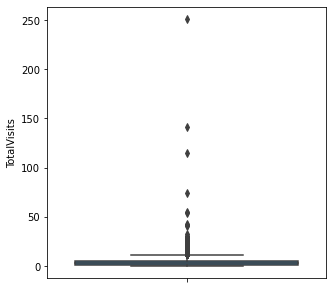

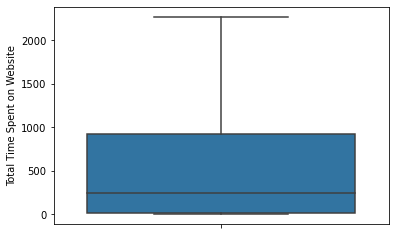

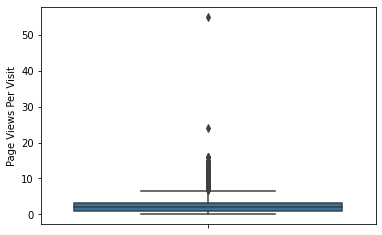

In [70]:
plt.figure(figsize = (5,5))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [71]:
## Lets remove top and bottom 1% of the outlier


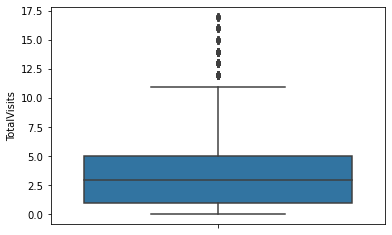

In [72]:
Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.01)
Lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [73]:
drp_col=['Country','Tags']
lead_data = lead_data.drop(drp_col,1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [74]:
cat_cols= lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [75]:
dum = pd.get_dummies(lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
lead_data_dum = pd.concat([lead_data, dum], axis=1)
lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [76]:
lead_data_dum = lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
from sklearn.model_selection import train_test_split
X = lead_data_dum.drop(['Converted'],axis = 1)
y = lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
#SPLIT data in 70 and 30 ratio 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [80]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 31),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 7),
 ('Specialization_International Business', False, 6),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 26),
 ('Specialization_Operations Management', False, 10),
 ('Specialization_Retail Management', False, 39),
 ('Specialization_Rural and Agribusiness', False, 5),
 ('Specialization_Services Excellence'

In [83]:
clmn = X_train.columns[rfe.support_]
X_train = X_train[clmn]

In [84]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2464.2
Date:                Tue, 18 Oct 2022   Deviance:                       4928.5
Time:                        18:32:27   Pearson chi2:                 6.30e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4828      0.466     -3.179      0.001      -2.397      -0.569
TotalVisits                                              1.9027      0.313      6.075      0.000       1.289       2.517
Total Time Spent on Website                              4.7151      0.176     26.821      0.000       4.371       5.060
Page Views Per Visit                                    -2.2889      0.461     -4.970      0.000      -3.192      -1.386
Lead Origin_Lead Add Form                               23.1692   4.25e+04      0.001      1.000   -8.32e+04    8.33e+04
Specialization_E-Business                                0.3970      0.449      0.883      0.377      -0.484       1.278
Specialization_Finance Management                        0.2727      0.117      2.338      0.019       0.044       0.501
Specialization_Healthcare Management                     0.2457      0.280      0.878      0.380      -0.302       0.794
Specialization_Marketing Management                      0.3261      0.123      2.657      0.008       0.086       0.567
Lead Source_Direct Traffic                              -1.0325      0.426     -2.426      0.015      -1.867      -0.198
Lead Source_Google                                      -0.5512      0.425     -1.298      0.194      -1.383       0.281
Lead Source_NC_EDM                                      23.5361   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   0.6682      0.425      1.571      0.116      -0.165       1.502
Lead Source_Organic Search                              -0.8529      0.436     -1.955      0.051      -1.708       0.002
Lead Source_Reference                                  -20.0213   4.25e+04     -0.000      1.000   -8.33e+04    8.32e+04
Lead Source_Referral Sites                              -0.6100      0.532     -1.146      0.252      -1.653       0.433
Lead Source_Social Media                                24.6414   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                           -17.5453   4.25e+04     -0.000      1.000   -8.33e+04    8.32e+04
Do Not Email_Yes                                        -1.3104      0.211     -6.201      0.000      -1.725      -0.896
Last Activity_Converted to Lead                         -0.8278      0.233     -3.546      0.000      -1.285      -0.370
Last Activity_Email Bounced                             -1.1222      0.411     -2.733      0.006      -1.927      -0.317
Last Activity_Form Submitted on Website                 -0.8453      0.382     -2.212      0.027      -1.594      -0.096
Last Activity_Had a Phone Conversation                  -0

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,138.94
13,Lead Source_Reference,105.54
16,Lead Source_Welingak Website,33.90
9,Lead Source_Google,11.18
8,Lead Source_Direct Traffic,10.12
33,Last Notable Activity_Email Opened,8.16
2,Page Views Per Visit,6.45
25,Last Activity_SMS Sent,6.40


In [86]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [87]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2471.3
Date:                Tue, 18 Oct 2022   Deviance:                       4942.5
Time:                        18:32:28   Pearson chi2:                 6.33e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4268      0.466     -3.063      0.002      -2.340      -0.514
TotalVisits                                              1.8885      0.312      6.048      0.000       1.276       2.500
Total Time Spent on Website                              4.7111      0.176     26.841      0.000       4.367       5.055
Page Views Per Visit                                    -2.2734      0.460     -4.945      0.000      -3.174      -1.372
Lead Origin_Lead Add Form                               21.1722   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
Specialization_E-Business                                0.4048      0.448      0.904      0.366      -0.472       1.282
Specialization_Finance Management                        0.2810      0.116      2.418      0.016       0.053       0.509
Specialization_Healthcare Management                     0.3042      0.278      1.095      0.274      -0.240       0.849
Specialization_Marketing Management                      0.3255      0.123      2.656      0.008       0.085       0.566
Lead Source_Direct Traffic                              -1.0298      0.425     -2.421      0.015      -1.864      -0.196
Lead Source_Google                                      -0.5464      0.424     -1.288      0.198      -1.378       0.285
Lead Source_NC_EDM                                      21.5203   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.6617      0.425      1.556      0.120      -0.172       1.495
Lead Source_Organic Search                              -0.8620      0.436     -1.977      0.048      -1.717      -0.007
Lead Source_Reference                                  -17.9673   1.56e+04     -0.001      0.999   -3.06e+04    3.06e+04
Lead Source_Referral Sites                              -0.6291      0.533     -1.180      0.238      -1.674       0.416
Lead Source_Social Media                                22.6454   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                           -15.5424   1.56e+04     -0.001      0.999   -3.06e+04    3.06e+04
Do Not Email_Yes                                        -1.3262      0.211     -6.273      0.000      -1.741      -0.912
Last Activity_Converted to Lead                         -0.8408      0.233     -3.606      0.000      -1.298      -0.384
Last Activity_Email Bounced                             -1.1307      0.411     -2.753      0.006      -1.936      -0.326
Last Activity_Form Submitted on Website                 -0.8592      0.382     -2.250      0.024      -1.608      -0.111
Last Activity_Had a Phone Conversation                   1

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,138.94
13,Lead Source_Reference,105.54
16,Lead Source_Welingak Website,33.90
9,Lead Source_Google,11.14
8,Lead Source_Direct Traffic,10.09
32,Last Notable Activity_Email Opened,8.13
2,Page Views Per Visit,6.45
25,Last Activity_SMS Sent,6.38


In [89]:
X_train.drop(['Page Views Per Visit','Last Notable Activity_Resubscribed to emails','Last Activity_Resubscribed to emails','Lead Origin_Lead Add Form','Lead Source_Reference', 'Lead Source_Welingak Website','Lead Source_Google','Lead Source_Direct Traffic', 'Last Notable Activity_Email Opened'], axis = 1, inplace = True)

In [90]:
#X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)

In [91]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.2
Date:                Tue, 18 Oct 2022   Deviance:                       5690.4
Time:                        18:32:29   Pearson chi2:                 6.17e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2395      0.112    -20.000      0.000      -2.459      -2.020
TotalVisits                                             -1.3313      0.238     -5.602      0.000      -1.797      -0.866
Total Time Spent on Website                              3.5940      0.157     22.860      0.000       3.286       3.902
Specialization_E-Business                                0.0708      0.416      0.170      0.865      -0.744       0.885
Specialization_Finance Management                        0.1586      0.106      1.492      0.136      -0.050       0.367
Specialization_Healthcare Management                     0.3430      0.250      1.370      0.171      -0.148       0.834
Specialization_Marketing Management                      0.1933      0.113      1.712      0.087      -0.028       0.415
Lead Source_NC_EDM                                      21.8810   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                                   0.5193      0.107      4.862      0.000       0.310       0.729
Lead Source_Organic Search                              -0.2482      0.107     -2.309      0.021      -0.459      -0.037
Lead Source_Referral Sites                              -0.1605      0.328     -0.489      0.625      -0.803       0.482
Lead Source_Social Media                                21.9380   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Do Not Email_Yes                                        -1.0791      0.181     -5.959      0.000      -1.434      -0.724
Last Activity_Converted to Lead                         -1.1211      0.213     -5.257      0.000      -1.539      -0.703
Last Activity_Email Bounced                             -1.0960      0.366     -2.994      0.003      -1.813      -0.379
Last Activity_Form Submitted on Website                 -0.6692      0.351     -1.907      0.057      -1.357       0.019
Last Activity_Had a Phone Conversation                   1.7869      0.776      2.303      0.021       0.266       3.308
Last Activity_Olark Chat Conversation                   -1.2424      0.201     -6.190      0.000      -1.636      -0.849
Last Activity_Page Visited on Website                   -0.4587      0.218     -2.100      0.036      -0.887      -0.031
Last Activity_SMS Sent                                   1.1177      0.075     14.954      0.000       0.971       1.264
Last Activity_Unreachable                               -1.3140      0.637     -2.064      0.039      -2.562      -0.066
What is your current occupation_Other                    1.8910      0.799      2.366      0.018       0.325       3.457
What is your current occupation_Student                  1

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,Last Notable Activity_Modified,2.85
0,TotalVisits,2.74
17,Last Activity_Page Visited on Website,2.58
22,What is your current occupation_Unemployed,2.34
16,Last Activity_Olark Chat Conversation,2.32
27,Last Notable Activity_Page Visited on Website,2.26
1,Total Time Spent on Website,2.11
13,Last Activity_Email Bounced,2.01
11,Do Not Email_Yes,1.93
18,Last Activity_SMS Sent,1.65


In [93]:
## Lets Create Prediction

In [94]:
y_train_predict = res.predict(X_train_sm)
y_train_predict[:10]

3523    0.205312
3267    0.541109
5653    0.630848
5072    0.151844
3704    0.247656
1790    0.186996
2482    0.236644
1694    0.247403
8768    0.227327
9225    0.024658
dtype: float64

In [95]:
y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.20531156, 0.54110888, 0.63084783, 0.15184375, 0.24765559,
       0.18699646, 0.23664399, 0.24740285, 0.22732673, 0.02465786])

In [96]:
y_train_predict_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_predict})
y_train_predict_final.head()

,Converted,Conversion_Prob
0,0,0.205312
1,1,0.541109
2,1,0.630848
3,0,0.151844
4,0,0.247656


In [97]:
y_train_predict_final['Predicted'] = y_train_predict_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.205312,0
1,1,0.541109,1
2,1,0.630848,1
3,0,0.151844,0
4,0,0.247656,0


In [98]:
confuse = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.Predicted )
confuse

array([[3363,  552],
       [ 808, 1570]], dtype=int64)

In [99]:
metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.Predicted)

0.7838868584141109

In [100]:
## So its around 79% accuracy

In [101]:
TP = confuse[1,1]
TN = confuse[0,0]
FP = confuse[0,1] 
FN = confuse[1,0]

In [102]:
## Sensitivity 

TP/(TP+FN)

0.6602186711522288

In [103]:
## specificity

TN/(TN+FP)

0.8590038314176245

In [104]:
## ROC Curve

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

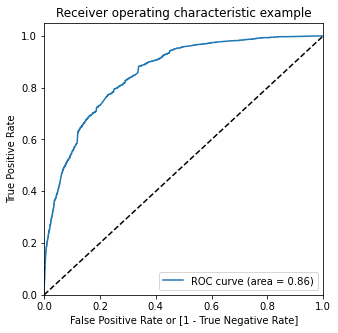

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_final.Converted, y_train_predict_final.Conversion_Prob, drop_intermediate = False)

draw_roc(y_train_predict_final.Converted, y_train_predict_final.Conversion_Prob)

In [107]:
numb = [float(x)/10 for x in range(10)]
for i in numb:
    y_train_predict_final[i]= y_train_predict_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_predict_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.205312,0,1,1,1,0,0,0,0,0,0,0
1,1,0.541109,1,1,1,1,1,1,1,0,0,0,0
2,1,0.630848,1,1,1,1,1,1,1,1,0,0,0
3,0,0.151844,0,1,1,0,0,0,0,0,0,0,0
4,0,0.247656,0,1,1,1,0,0,0,0,0,0,0


In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.588114,0.979815,0.350192
0.2,0.2,0.704275,0.928091,0.568327
0.3,0.3,0.750040,0.834735,0.698595
0.4,0.4,0.776577,0.730446,0.804598
0.5,0.5,0.783887,0.660219,0.859004
0.6,0.6,0.766089,0.523970,0.913155
0.7,0.7,0.742571,0.398654,0.951469
0.8,0.8,0.720324,0.306981,0.971392
0.9,0.9,0.687430,0.185870,0.992082


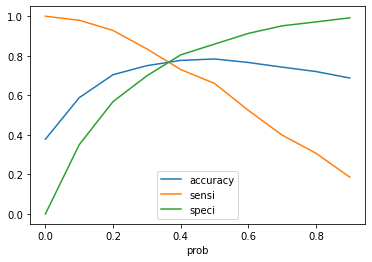

In [109]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
y_train_predict_final['final_predicted'] = y_train_predict_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_predict_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.205312,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.541109,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.630848,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.151844,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.247656,0,1,1,1,0,0,0,0,0,0,0,0


In [111]:
### Now lets check over all accuracy

In [112]:
metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.final_predicted)

0.7652947719688543

In [113]:
confuse2 = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.final_predicted )
confuse2

array([[2923,  992],
       [ 485, 1893]], dtype=int64)

In [114]:
TP = confuse2[1,1]
TN = confuse2[0,0]
FP = confuse2[0,1] 
FN = confuse2[1,0]

In [115]:
###sensitivity

TP/(TP+FN)

0.7960470984020185

In [116]:
#### specificity

TN/(TN+FP)

0.7466155810983397

In [117]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [118]:
col = X_train.columns
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Specialization_E-Business,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Marketing Management,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Unreachable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
3308,1.0,0.117647,0.050176,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2169,1.0,0.588235,0.390405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7836,1.0,0.588235,0.227113,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1263,1.0,0.117647,0.376320,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
y_test_predict = res.predict(X_test_sm)
y_predict_df = pd.DataFrame(y_test_predict)
y_test_df = pd.DataFrame(y_test)
y_predict_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_predict_final = pd.concat([y_test_df, y_predict_df],axis=1)
y_predict_final= y_predict_final.rename(columns = {0 : 'Conversion_Prob'})
y_predict_final.head()

,Converted,Conversion_Prob
0,0,0.098345
1,1,0.664645
2,1,0.333383
3,0,0.030099
4,0,0.165282


In [120]:
y_predict_final['final_predicted'] = y_predict_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_predict_final

,Converted,Conversion_Prob,final_predicted
0,0,0.098345,0
1,1,0.664645,1
2,1,0.333383,0
3,0,0.030099,0
4,0,0.165282,0
...,...,...,...
2693,1,0.124187,0
2694,1,0.757303,1
2695,0,0.057330,0
2696,1,0.981791,1


In [121]:
metrics.accuracy_score(y_predict_final['Converted'], y_predict_final.final_predicted)

0.7724240177909563

In [122]:
confuse3 = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.final_predicted )
confuse3

array([[2923,  992],
       [ 485, 1893]], dtype=int64)

In [123]:
TP = confuse3[1,1]
TN = confuse3[0,0]
FP = confuse3[0,1]
FN = confuse3[1,0]

In [124]:
## Precision

TP/(TP + FP)

0.6561525129982669

In [125]:
## Recall
TP/(TP + FN)

0.7960470984020185

In [126]:
y_test_predict = res.predict(X_test_sm)
y_predict_df = pd.DataFrame(y_test_predict)
y_test_df = pd.DataFrame(y_test)
y_predict_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_predict_final = pd.concat([y_test_df, y_predict_df],axis=1)
y_predict_final= y_predict_final.rename(columns = {0 : 'Conversion_Prob'})
y_predict_final.head()

,Converted,Conversion_Prob
0,0,0.098345
1,1,0.664645
2,1,0.333383
3,0,0.030099
4,0,0.165282


In [127]:
y_predict_final['final_predicted'] = y_predict_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_predict_final

,Converted,Conversion_Prob,final_predicted
0,0,0.098345,0
1,1,0.664645,1
2,1,0.333383,0
3,0,0.030099,0
4,0,0.165282,0
...,...,...,...
2693,1,0.124187,0
2694,1,0.757303,1
2695,0,0.057330,0
2696,1,0.981791,1


In [128]:
metrics.accuracy_score(y_predict_final['Converted'], y_predict_final.final_predicted)

0.782060785767235

In [129]:
confuse4 = metrics.confusion_matrix(y_predict_final['Converted'], y_predict_final.final_predicted )
confuse4

array([[1388,  289],
       [ 299,  722]], dtype=int64)

In [130]:
TP = confuse4[1,1]
TN = confuse4[0,0]
FP = confuse4[0,1] 
FN = confuse4[1,0]

In [131]:
## Precision 


TP/(TP + FP)

0.7141444114737884

In [132]:
## Recall

TP/(TP + FN)

0.7071498530852106